In [13]:
import os
import sys
import time
import PIL
import csv


import pandas as pd
import numpy as np

from time import strftime, gmtime
from os import listdir
from os.path import isfile, join 
from PIL import Image

In [2]:
# http://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script

import sys
sys.path.append('C:/Anaconda/Lib/site-packages')

import cv2

In [4]:
DATA_DIR = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/'
IMG_DIR = 'C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/'

rbcPath = IMG_DIR + 'rbcs/'

In [5]:
rbcImgFiles = [f for f in listdir(rbcPath) if isfile(join(rbcPath,f))]

In [11]:
def return_image(n):
    return Image.open(IMG_DIR + 'rbcs/{}'.format(n))

In [14]:
def cv_image(n):
    return cv2.imread(IMG_DIR + 'rbcs/{}'.format(n))

In [15]:
cv_image(rbcImgFiles[0])

array([[[160, 166, 201],
        [163, 169, 204],
        [170, 175, 208],
        ..., 
        [167, 146, 195],
        [169, 140, 189],
        [174, 141, 186]],

       [[160, 167, 200],
        [166, 171, 204],
        [171, 176, 209],
        ..., 
        [168, 147, 196],
        [171, 142, 191],
        [175, 145, 188]],

       [[166, 171, 204],
        [170, 175, 208],
        [175, 180, 211],
        ..., 
        [167, 145, 194],
        [171, 142, 191],
        [175, 145, 188]],

       ..., 
       [[223, 242, 255],
        [226, 244, 251],
        [227, 243, 242],
        ..., 
        [215, 231, 248],
        [216, 216, 240],
        [192, 176, 207]],

       [[221, 237, 253],
        [221, 239, 246],
        [220, 236, 235],
        ..., 
        [216, 234, 251],
        [218, 222, 246],
        [196, 184, 214]],

       [[219, 235, 251],
        [218, 236, 243],
        [214, 229, 231],
        ..., 
        [216, 239, 255],
        [219, 230, 252],
        [197, 193,

In [68]:
def getdata(x,y,w,h):
    im_array = np.array(return_image(rbcImgFiles[0]))
    im_array = im_array[y:y+h, x:x+w]
    return im_array

In [97]:
# Workflow should be: color->gray, blur, threshold(binarizes it), find contours, create mask for each contour, /
# more simply; find contours --> draw contours --> mask image

# cv image object
im = cv_image(rbcImgFiles[0])
im_array = np.array(return_image(rbcImgFiles[0]))

# convert to gray scale
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

# preprocessing technique for better tresholding
imgray = cv2.medianBlur(imgray, 5)

# have to 'thresh' for findCountours()..i.e. findContours() needs binary image. Both produce new images. 
# (<image>, <threshold value>, <max threshold>, ?)
ret,thresh = cv2.threshold(imgray,205,255,0)

# find the contours
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# create mask image where all elements are zero (black image) with same size as source (1st param)
# np.zeros returns array of given shape filled with zeros
mask = np.zeros(imgray.shape,np.uint8) 

coordinates = []
crop_array_list = []
idx = []
x = 0 
i = 0
# filter the contours based on area
for h, cnt in enumerate(contours):
#     length = cv2.arcLength(cnt, True)
#     if length < 120:
#         continue
#     if length > 210:
#         continue
#     if len(cnt) < 5:
#         continue
    area = cv2.contourArea(cnt)
    if area < 300:
        continue
    if area > 3000:
        continue
    
#     hull = cv2.convexHull(cnt,returnPoints = False)
#     defects = cv2.convexityDefects(cnt,hull)
#     if defects is None:
#         continue
        
    x,y,w,h = cv2.boundingRect(cnt) 
    
    cw = w/2
    ch = h/2
    
    new_x = (x+cw)-50
    new_y = (y+ch)-50
    new_w = 100
    new_h = 100
    
    xywh = new_x,new_y,new_w,new_h
    coordinates.append(xywh)
    
    crop_array = im_array[new_y:new_y+new_h, new_x:new_x+new_w]
    if crop_array.shape != (100, 100, 3):
        continue
        
    crop_array_list.append(crop_array)
    
    #crop and save each object
#     crop_img = im[y: y + h, x: x + w]
#     cv2.imwrite('%s.png'%idx, crop_img)
#     idx += 1
    # build full list of rect params
#     param = cv2.boundingRect(cnt) 
#     rectParameters.append(param)
    
#     if i == 1200:
        # draw rectangles on image
#         cv2.rectangle(im,(new_x,new_y),(new_x+100,new_y+100),(0,255,0),2)
#         cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
#         cv2.drawContours(cnt_mask, [cnt],0,255,-1)
#         print xywh
#     # draw contours
#     cv2.drawContours(im, [cnt],0,255,-1)
#     i +=1
    
# imgName = 'test.png'
# cv2.imwrite(imgName, cnt_mask)

# cv2.imshow("Image", mask)
# cv2.waitKey(0) 

In [98]:

len(crop_array_list)

3107

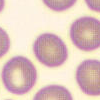

In [100]:
# link this array with tighter cropped array; label big, feed small to cnn


pic = Image.fromarray(crop_array_list[3000])
pic


In [66]:
coordinates[297]
# pic = Image.fromarray(coordinates[297])
# pic


(2442, 2550, 100, 100)